In [1]:
import os

dir = '/Users/julian/logs'

files = [o for o in os.listdir(dir) if o.endswith('.log')]
new_dir = os.path.join(dir, 'processed_logs')
if not os.path.exists(new_dir):
    os.makedirs(new_dir)

for file in files:
    filepath = os.path.join(dir, file)
    with open(filepath, 'r') as fin:
        data = fin.read().splitlines(True)
    csv_start = [i for i, s in enumerate(data) if 'epoch' in s][0]

    new_filepath = os.path.join(new_dir, file)
    with open(new_filepath, 'w') as fout:
        fout.writelines(data[csv_start:])


In [27]:
import os
import pandas as pd
import numpy as np

log_dir = '/Users/julian/logs/processed_logs'

files = [o for o in os.listdir(log_dir) if o.endswith('.log')]

data_df = None

for file in files:
    filepath = os.path.join(log_dir, file)

    file_args = file[:-4].split('-')
    learning_rate = float('-'.join(file_args[0:-1]))
    network_size = int(file_args[-1])
    
    filepath = os.path.join(log_dir, file)
    file_df = pd.read_csv(filepath)
    file_df['learning_rate'] = learning_rate
    file_df['network_size'] = network_size
    
    if data_df is None: 
        data_df = file_df
    else:
        data_df = data_df.append(file_df, ignore_index = True)
        
        

4.042638580152501-17.log ['4.042638580152501', '17'] 4.042638580152501 17
0.0245850504905253-3.log ['0.0245850504905253', '3'] 0.0245850504905253 3
0.13807311408972775-19.log ['0.13807311408972775', '19'] 0.13807311408972775 19
3.571964108520174e-05-19.log ['3.571964108520174e', '05', '19'] 3.571964108520174e-05 19
0.5067528838353075-7.log ['0.5067528838353075', '7'] 0.5067528838353075 7
8.855056864172259e-05-13.log ['8.855056864172259e', '05', '13'] 8.855056864172259e-05 13
9.533013106232234e-05-13.log ['9.533013106232234e', '05', '13'] 9.533013106232234e-05 13
2.1147027447398785-1.log ['2.1147027447398785', '1'] 2.1147027447398785 1
0.0007203931769282059-9.log ['0.0007203931769282059', '9'] 0.0007203931769282059 9
0.00020598245968275218-19.log ['0.00020598245968275218', '19'] 0.00020598245968275218 19
0.0011382960505061926-13.log ['0.0011382960505061926', '13'] 0.0011382960505061926 13
0.30097494663605684-17.log ['0.30097494663605684', '17'] 0.30097494663605684 17
0.00114025704641104

0.01225377592532749-5.log ['0.01225377592532749', '5'] 0.01225377592532749 5
0.10771449354603199-3.log ['0.10771449354603199', '3'] 0.10771449354603199 3
0.18573731944076197-19.log ['0.18573731944076197', '19'] 0.18573731944076197 19
4.659132882343628-3.log ['4.659132882343628', '3'] 4.659132882343628 3
0.000571477649103236-13.log ['0.000571477649103236', '13'] 0.000571477649103236 13
3.029199006739696e-05-13.log ['3.029199006739696e', '05', '13'] 3.029199006739696e-05 13
6.523339513313799-13.log ['6.523339513313799', '13'] 6.523339513313799 13
0.0004924157082988383-11.log ['0.0004924157082988383', '11'] 0.0004924157082988383 11
0.043985875400688185-19.log ['0.043985875400688185', '19'] 0.043985875400688185 19
2.5975675671371516-7.log ['2.5975675671371516', '7'] 2.5975675671371516 7
2.4312481181596857-11.log ['2.4312481181596857', '11'] 2.4312481181596857 11
0.0005874590815701057-17.log ['0.0005874590815701057', '17'] 0.0005874590815701057 17
0.001277426233206184-7.log ['0.001277426233

1.373756220732884e-05-3.log ['1.373756220732884e', '05', '3'] 1.373756220732884e-05 3
0.001009006581861021-7.log ['0.001009006581861021', '7'] 0.001009006581861021 7
0.2993175185114481-3.log ['0.2993175185114481', '3'] 0.2993175185114481 3
0.08499966133002135-19.log ['0.08499966133002135', '19'] 0.08499966133002135 19
0.00013602565688201784-13.log ['0.00013602565688201784', '13'] 0.00013602565688201784 13
3.4624141312594925-7.log ['3.4624141312594925', '7'] 3.4624141312594925 7
0.00048591791725361447-5.log ['0.00048591791725361447', '5'] 0.00048591791725361447 5
6.852031930052933-5.log ['6.852031930052933', '5'] 6.852031930052933 5
0.21005248985280445-13.log ['0.21005248985280445', '13'] 0.21005248985280445 13
0.3949599919504149-15.log ['0.3949599919504149', '15'] 0.3949599919504149 15
0.021174420475272335-7.log ['0.021174420475272335', '7'] 0.021174420475272335 7
1.4257028363452159e-05-7.log ['1.4257028363452159e', '05', '7'] 1.4257028363452159e-05 7
0.048054702333540686-9.log ['0.048

In [29]:
data_df['learning_rate'].max()

9.805019971174474

In [30]:

argmax_val_dice = data_df['val_dice'].idxmax()
best_params = data_df.iloc[argmax_val_dice]
print(best_params)



epoch                 28.000000
train_loss             0.755746
train_volume_error    27.181268
train_dice             0.246737
val_loss               0.674215
val_volume_error       7.849591
val_dice               0.332382
learning_rate          0.196718
network_size          13.000000
Name: 5698, dtype: float64


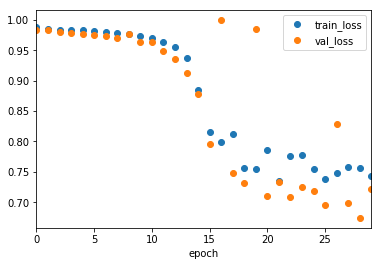

In [31]:
import matplotlib.pyplot as plt

best_lr_df = data_df[data_df.learning_rate==best_params['learning_rate']]
best_lr_df.plot(x='epoch', y=['train_loss', 'val_loss'], style='o')


plt.show()


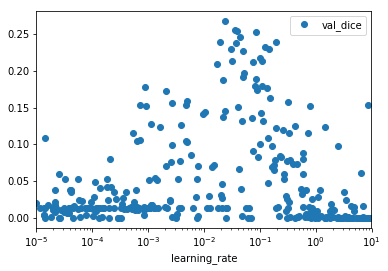

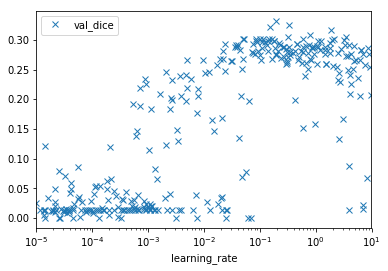

In [32]:
import matplotlib.pyplot as plt

median_lr_df = data_df.groupby('learning_rate').median()
median_lr_df.plot(y='val_dice', style='o', logx=True) 

median_lr_df = data_df.groupby('learning_rate').max()
median_lr_df.plot(y='val_dice', style='x', logx=True) 

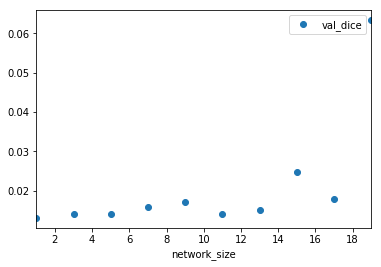

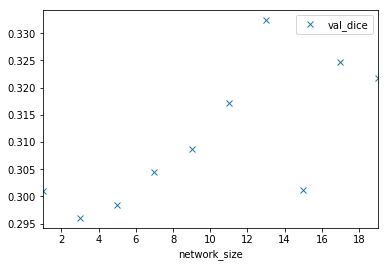

In [33]:
median_lr_df = data_df.groupby('network_size').median()
median_lr_df.plot(y='val_dice', style='o') 

median_lr_df = data_df.groupby('network_size').max()
median_lr_df.plot(y='val_dice', style='x') 

In [35]:
data_df.to_csv(os.path.join(log_dir, 'log_df'), index=False)